<a href="https://colab.research.google.com/github/Franklinyeruan/CHEM101.6/blob/main/Wk6_Project_5_MetaDynamics_Comparing_CVs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install plumed pip
!pip install plumed
import plumed 

     |████████████████████████████████| 273 kB 4.0 MB/s 
  Created wheel for plumed: filename=plumed-2.8.0-cp37-cp37m-linux_x86_64.whl size=779903 sha256=b494d71a018153cd559228501a4c3c4414b97305993abe89357f5b93d4df3d1c
  Stored in directory: /root/.cache/pip/wheels/e9/79/2a/5ff229a292ee82639a0c307273d9d82b43a97f10311c82d56a
Successfully built plumed


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Download and unzip the compressed folder of GROMACS 2020.6 version
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs.tar.gz
!tar xzf gromacs.tar.gz

--2022-03-11 20:55:37--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35608971 (34M) [application/octet-stream]
Saving to: ‘gromacs.tar.gz’

gromacs.tar.gz      100%[===================>]  33.96M   117MB/s    in 0.3s    

2022-03-11 20:55:38 (117 MB/s) - ‘gromacs.tar.gz’ saved [35608971/35608971]



In [5]:
# It is recommended (and required for GROMACS 2021) to upgrade cmake
!pip install cmake --upgrade

     |████████████████████████████████| 22.7 MB 44 kB/s 
  Attempting uninstall: cmake
    Found existing installation: cmake 3.12.0
    Uninstalling cmake-3.12.0:
      Successfully uninstalled cmake-3.12.0


In [6]:
# Checking that our GROMACS works
%%bash
source /content/gromacs/bin/GMXRC
gmx -h

SYNOPSIS

gmx [-[no]h] [-[no]quiet] [-[no]version] [-[no]copyright] [-nice <int>]
    [-[no]backup]

OPTIONS

Other options:

 -[no]h                     (no)
           Print help and quit
 -[no]quiet                 (no)
           Do not print common startup info or quotes
 -[no]version               (no)
           Print extended version information and quit
 -[no]copyright             (yes)
           Print copyright information on startup
 -nice   <int>              (19)
           Set the nicelevel (default depends on command)
 -[no]backup                (yes)
           Write backups if output files exist

Additional help is available on the following topics:
    commands    List of available commands
    selections  Selection syntax and usage
To access the help, use 'gmx help <topic>'.
For help on a command, use 'gmx help <command>'.


                         :-) GROMACS - gmx, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
        M

In [7]:
#Installing biopython using pip
!pip install biopython

     |████████████████████████████████| 2.3 MB 4.0 MB/s 


In [8]:
# Nglview (Must install these first)
!pip install -q nglview pytraj
from google.colab import output
output.enable_custom_widget_manager()

# install dependencies 
!pip -q install py3Dmol 2>&1 1>/dev/null
!pip install --upgrade MDAnalysis 2>&1 1>/dev/null
!pip install biopandas 2>&1 1>/dev/null

# Openmm
import sys
print(sys.version)
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
!bash Miniconda3-py*.sh -bfp /usr/local
!conda config --set always_yes yes
!conda config --add channels conda-forge
!conda create -n openmm python=3.7 cudatoolkit=10.0 git jupyterlab numpy pandas scipy matplotlib ipympl rdkit openbabel openmm mdtraj pymbar pdbfixer parmed openff-toolkit openmoltools openmmforcefields
sys.path.append('/usr/local/envs/openmm/lib/python3.7/site-packages')
import openmm.testInstallation
openmm.testInstallation.main()

# mdtraj 
!conda install -c conda-forge mdtraj 

     |████████████████████████████████| 5.7 MB 3.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.1 MB 32.2 MB/s 
3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
--2022-03-11 20:58:14--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>]  84.90M   120MB/s    in 0.7s    

2022-03-11 20:58:15 (120 MB/s) - ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’ saved [89026327/89026327]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Pl

In [9]:
!conda install --strict-channel-priority -c plumed/label/masterclass -c conda-forge gromacs
!conda create --name plumed-masterclass python=3.9
!conda activate plumed-masterclass
!conda install -c conda-forge plumed py-plumed numpy pandas matplotlib notebook mdtraj mdanalysis git

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [10]:
#import plumed
import matplotlib.pyplot as plt
import os
import MDAnalysis
import mdtraj as md 
import numpy as np
import math


#Run a simulation

#Comparing CV 1: Good CV: You can see good converges of error and you see all the basins in the free energy heatmap


In [16]:
%%bash
# Exercise 6 - good CV
# create directory for this exercise
mkdir -p Exercise-6/new_CV; cd Exercise-6/new_CV
# create PLUMED input file
cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../../dialaA.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C
# you should use MOLINFO shortcuts
phi: TORSION ATOMS=@phi-2
# Compute the backbone dihedral angle psi, defined by atoms N-CA-C-N
# here also you should to use MOLINFO shortcuts
psi: TORSION ATOMS=@psi-2
# the difference between the two structures is 0.116584 nm
rA: RMSD REFERENCE=../../sA.pdb TYPE=OPTIMAL
rB: RMSD REFERENCE=../../sB.pdb TYPE=OPTIMAL
# define progression CV
s: CUSTOM ARG=rA,rB VAR=x,y PERIODIC=NO FUNC=x^y
# Activate well-tempered metadynamics in phi
metad: METAD ARG=s ...
  # Deposit a Gaussian every 500 time steps, with initial height
  # equal to 1.2 kJ/mol and bias factor equal to 8
  PACE=500 HEIGHT=1.2 BIASFACTOR=8
  # Gaussian width (sigma) should be chosen based on the CV fluctuations in unbiased run
  # try 1/2 or 1/3 of the estimated fluctuations
  SIGMA=0.05
  # Gaussians will be written to file and also stored on grid
  FILE=HILLS GRID_MIN=0 GRID_MAX=3
...
# Print both collective variables on COLVAR file every 10 steps
PRINT ARG=phi,psi,rA,rB,s FILE=COLVAR STRIDE=10
EOF

# run simulation
gmx mdrun -s ../../topolA.tpr -nsteps 10000000 -plumed plumed.dat

                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


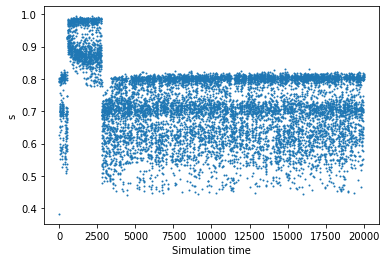

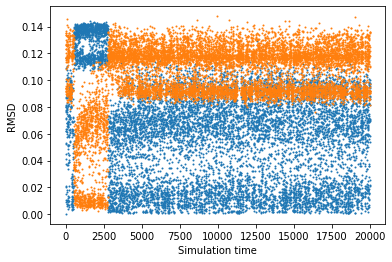

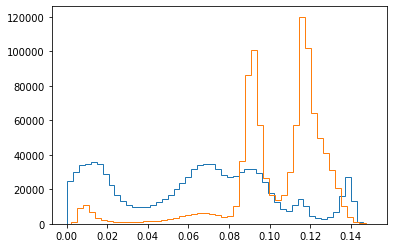

In [17]:
# visualize CV file
data=plumed.read_as_pandas("/content/Exercise-6/new_CV/COLVAR")
# plot the s-path variable during the simulation
plt.plot(data["time"][::100],data["s"][::100],'o', ms=1)
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("s")
plt.show()
plt.clf()

# plot the s-path variable during the simulation
plt.plot(data["time"][::100],data["rA"][::100],'o', ms=1,label='rA')
plt.plot(data["time"][::100],data["rB"][::100],'o', ms=1,label='rB')
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("RMSD")
plt.show()
plt.clf

plt.hist(data["rA"],bins=50,histtype='step')
plt.hist(data["rB"],bins=50,histtype='step')
plt.show()

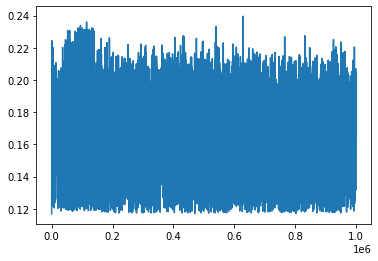

In [18]:
x=data["rA"][::100]
y=data["rB"][::100]
f=x^y
plt.plot(f)

Text(0, 0.5, 'phi [rad]')

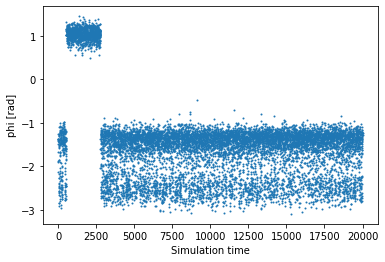

In [19]:
# plot phi during the simulation
plt.plot(data["time"][::100],data["phi"][::100],'o', ms=1)
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("phi [rad]")

Text(0, 0.5, 'psi [rad]')

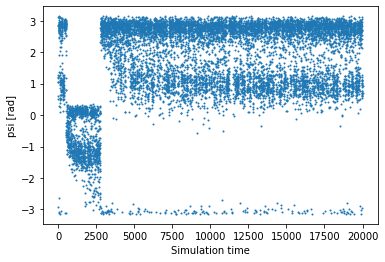

In [20]:
# plot phi during the simulation
plt.plot(data["time"][::100],data["psi"][::100],'o', ms=1)
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("psi [rad]")

## Error in free energy

Another Sim

In [21]:
%%bash
# Calculate error in free-energy
cd Exercise-6/new_CV

# prepare PLUMED input file for reweighting
cat > "plumed_reweight.dat" << EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../../dialaA.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C
# you should use MOLINFO shortcuts
phi: TORSION ATOMS=@phi-2
# Compute the backbone dihedral angle psi, defined by atoms N-CA-C-N
# here also you should to use MOLINFO shortcuts
psi: TORSION ATOMS=@psi-2
# the difference between the two structures is 0.116584 nm
rA: RMSD REFERENCE=../../sA.pdb TYPE=OPTIMAL
rB: RMSD REFERENCE=../../sB.pdb TYPE=OPTIMAL
# define progression CV
s: CUSTOM ARG=rA,rB VAR=x,y PERIODIC=NO FUNC=x+y
# Activate well-tempered metadynamics in phi
metad: METAD ARG=s ...
   # Deposit a Gaussian every 10000000 time steps (never!), with initial height equal to 0.0 kJ/mol 
   PACE=10000000 HEIGHT=0.0 BIASFACTOR=8# <- this is the new stuff! 
   # Gaussian width (sigma) should be chosen based on the CV fluctuations in unbiased run 
   SIGMA=0.05
   # Gaussians will be written to file and also stored on grid
   FILE=HILLS GRID_MIN=0 GRID_MAX=3
   # Say that METAD should be restarting (= reading an existing HILLS file) 
   RESTART=YES # <- this is the new stuff! 
...
# Print out the values of phi, psi and the metadynamics bias potential
PRINT ARG=phi,psi,rA,rB,s,metad.bias FILE=COLVAR_REWEIGHT STRIDE=1 # <- also change this one!
EOF

# analyze with PLUMED driver
plumed driver --mf_xtc traj_comp.xtc --plumed plumed_reweight.dat --kt 2.494339

# create phi.weight file with phi and weight from COLVAR_REWEIGHT
# find maximum of bias
bmax=`sort -n -k 4 COLVAR_REWEIGHT  | tail -n 1 | awk '{print $4}'`
# create phi.weight file
awk '{if($1!="#!") print $2,exp(($4-bm)/2.494339)}' bm=$bmax COLVAR_REWEIGHT > phi.weight

# and now do block analysis with block sizes from 1 to 5000 (every 50)
# create PLUMED-like header for output file
echo "#! FIELDS bsize err" > err.blocks
for i in `seq 1 50 5000`
do
 # run the python script
 python ../../do_block_fes.py phi.weight 1 -3.141593 3.141593 50 2.494339 $i
 # calculate average error along the free-energy profile (remove Inf)
 grep -v Inf fes.$i.dat | awk 'BEGIN{tot=0}{tot+=$3}END{print i,tot/NR}' i=$i
done >> err.blocks


DRIVER: Found molfile format trajectory xtc with name traj_comp.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:52:46
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 22
PLUMED: File suffix: 
PLUMED: FILE: plumed_reweight.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../../dialaA.pdb contains 1 chains 
PLUMED:   chain named   contains residues 1 to 3 and atoms 1 to 22 
PLUMED: Action TORSION
PLUMED:   with label phi
PLUMED:   between atoms 5 7 9 15
PLUMED:   using periodic boundary conditions
PLUMED: Action TORSION
PLUMED:  

Analysis 

In [23]:
#Lets Plot the Free Energy Surfaces of Each Simulation
def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


Text(0, 0.5, 'Average error on free-energy profile [kJ/mol]')

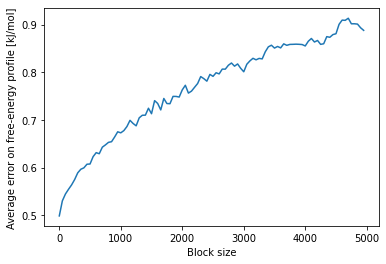

In [22]:
# import err.blocks file into pandas dataset
data=plumed.read_as_pandas("/content/Exercise-6/new_CV/err.blocks")
# plot error as a function of block size
plt.plot(data["bsize"],data["err"])
# x-y axis labels
plt.xlabel("Block size")
plt.ylabel("Average error on free-energy profile [kJ/mol]")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


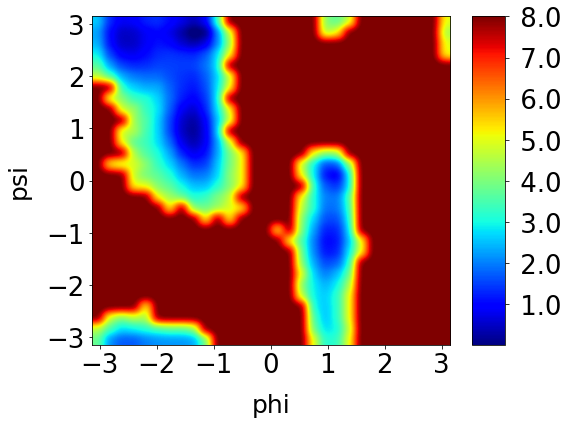

<Figure size 432x288 with 0 Axes>

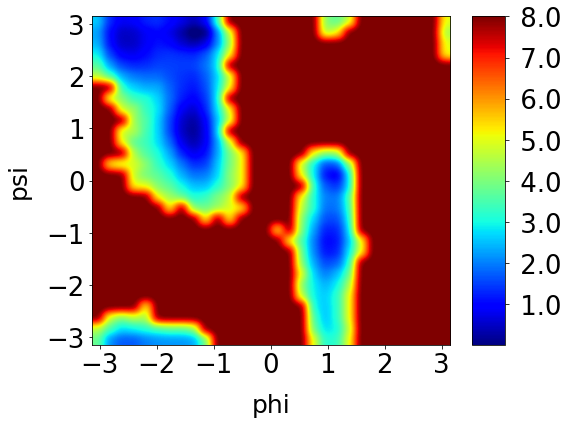

<Figure size 432x288 with 0 Axes>

In [25]:
# plot final fes
data_r=plumed.read_as_pandas("/content/Exercise-6/new_CV/COLVAR_REWEIGHT")

bias=data_r["metad.bias"]
kt=2.494339
w=np.exp(bias/kt)

#Lets Look at The Biased and Unbiased Distributions of the Dihedral Angles
dG,xedges,yedges=free_energy(data_r["psi"],data_r["phi"], 300, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()

def free_energy_weights(a, b, T, y0, ymax, x0, xmax,w):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=w)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges

dG,xedges,yedges=free_energy_weights(data_r["psi"],data_r["phi"], 300, -3.14, 3.14, -3.14, 3.14,w)
fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()

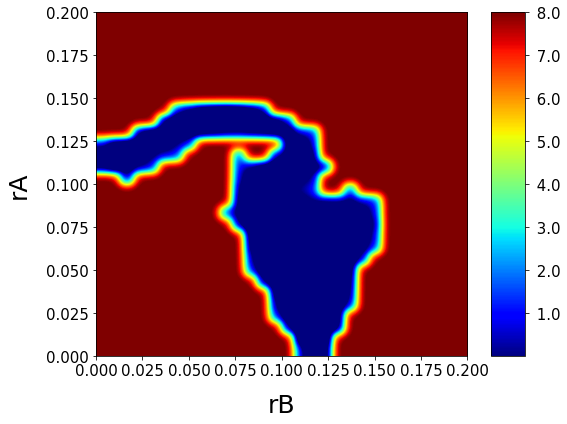

<Figure size 432x288 with 0 Axes>

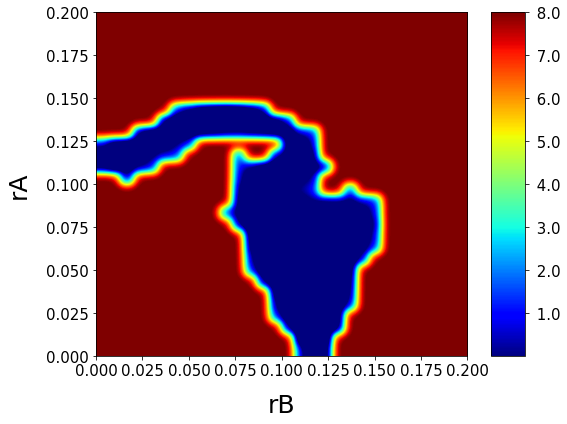

<Figure size 432x288 with 0 Axes>

In [26]:
#Lets Look at The Biased and Unbiased Distributions of the Dihedral Angles
dG,xedges,yedges=free_energy(data_r["rA"],data_r["rB"], 300, 0, 0.2, 0,.2)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(0,.2)
plt.ylim(0,.2)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("rA", size=25, labelpad=15)
plt.xlabel("rB", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='15')
plt.yticks(size='15')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='15')
plt.tight_layout()
plt.show()
plt.clf()

def free_energy_weights(a, b, T, y0, ymax, x0, xmax,w):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=w)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges

dG,xedges,yedges=free_energy_weights(data_r["rA"],data_r["rB"], 300, 0, 0.2, 0,.2,w)
fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(0,0.2)
plt.ylim(0,0.2)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("rA", size=25, labelpad=15)
plt.xlabel("rB", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='15')
plt.yticks(size='15')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='15')
plt.tight_layout()
plt.show()
plt.clf()

# Comparing CV 2: Try Again with BAD CV (You completely miss one of the basins as and average error on free energy is bad and unstable) 

In [30]:
%%bash
# Exercise 6 - good CV
# create directory for this exercise
mkdir -p Exercise-6/new_CV_2; cd Exercise-6/new_CV_2
# create PLUMED input file
cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../../dialaA.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C
# you should use MOLINFO shortcuts
phi: TORSION ATOMS=@phi-2
# Compute the backbone dihedral angle psi, defined by atoms N-CA-C-N
# here also you should to use MOLINFO shortcuts
psi: TORSION ATOMS=@psi-2
# the difference between the two structures is 0.116584 nm
rA: RMSD REFERENCE=../../sA.pdb TYPE=OPTIMAL
rB: RMSD REFERENCE=../../sB.pdb TYPE=OPTIMAL
# define progression CV
s: CUSTOM ARG=rA,rB VAR=x,y PERIODIC=NO FUNC=2*x+y
# Activate well-tempered metadynamics in phi
metad: METAD ARG=s ...
  # Deposit a Gaussian every 500 time steps, with initial height
  # equal to 1.2 kJ/mol and bias factor equal to 8
  PACE=500 HEIGHT=1.2 BIASFACTOR=8
  # Gaussian width (sigma) should be chosen based on the CV fluctuations in unbiased run
  # try 1/2 or 1/3 of the estimated fluctuations
  SIGMA=0.05
  # Gaussians will be written to file and also stored on grid
  FILE=HILLS GRID_MIN=0 GRID_MAX=3
...
# Print both collective variables on COLVAR file every 10 steps
PRINT ARG=phi,psi,rA,rB,s FILE=COLVAR STRIDE=10
EOF

# run simulation
gmx mdrun -s ../../topolA.tpr -nsteps 10000000 -plumed plumed.dat

                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


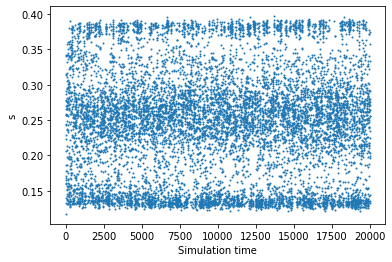

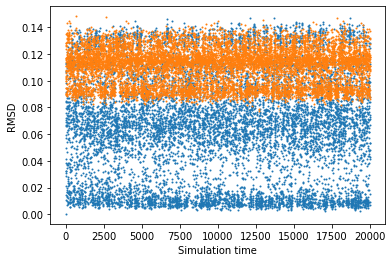

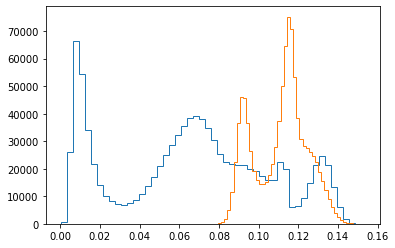

In [31]:
# visualize CV file
data=plumed.read_as_pandas("/content/Exercise-6/new_CV_2/COLVAR")
# plot the s-path variable during the simulation
plt.plot(data["time"][::100],data["s"][::100],'o', ms=1)
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("s")
plt.show()
plt.clf()

# plot the s-path variable during the simulation
plt.plot(data["time"][::100],data["rA"][::100],'o', ms=1,label='rA')
plt.plot(data["time"][::100],data["rB"][::100],'o', ms=1,label='rB')
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("RMSD")
plt.show()
plt.clf

plt.hist(data["rA"],bins=50,histtype='step')
plt.hist(data["rB"],bins=50,histtype='step')
plt.show()

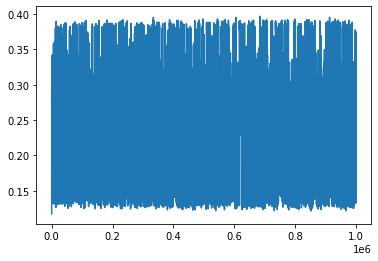

In [33]:
x=data["rA"][::100]
y=data["rB"][::100]
f=2*x+y
plt.plot(f)

Text(0, 0.5, 'phi [rad]')

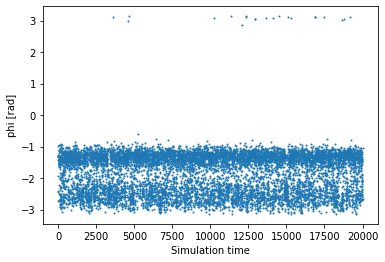

In [34]:
# plot phi during the simulation
plt.plot(data["time"][::100],data["phi"][::100],'o', ms=1)
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("phi [rad]")

Text(0, 0.5, 'psi [rad]')

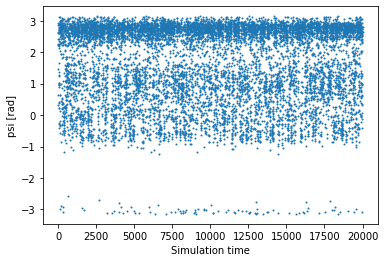

In [35]:
# plot phi during the simulation
plt.plot(data["time"][::100],data["psi"][::100],'o', ms=1)
# x-y axis labels
plt.xlabel("Simulation time")
plt.ylabel("psi [rad]")

In [47]:
%%bash
# Calculate error in free-energy
cd Exercise-6/new_CV_2

# prepare PLUMED input file for reweighting
cat > "plumed_reweight.dat" << EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../../dialaA.pdb 
# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C
# you should use MOLINFO shortcuts
phi: TORSION ATOMS=@phi-2
# Compute the backbone dihedral angle psi, defined by atoms N-CA-C-N
# here also you should to use MOLINFO shortcuts
psi: TORSION ATOMS=@psi-2
# the difference between the two structures is 0.116584 nm
rA: RMSD REFERENCE=../../sA.pdb TYPE=OPTIMAL
rB: RMSD REFERENCE=../../sB.pdb TYPE=OPTIMAL
# define progression CV
s: CUSTOM ARG=rA,rB VAR=x,y PERIODIC=NO FUNC=x+y
# Activate well-tempered metadynamics in phi
metad: METAD ARG=s ...
   # Deposit a Gaussian every 10000000 time steps (never!), with initial height equal to 0.0 kJ/mol 
   PACE=10000000 HEIGHT=0.0 BIASFACTOR=8# <- this is the new stuff! 
   # Gaussian width (sigma) should be chosen based on the CV fluctuations in unbiased run 
   SIGMA=0.05
   # Gaussians will be written to file and also stored on grid
   FILE=HILLS GRID_MIN=0 GRID_MAX=3
   # Say that METAD should be restarting (= reading an existing HILLS file) 
   RESTART=YES # <- this is the new stuff! 
...
# Print out the values of phi, psi and the metadynamics bias potential
PRINT ARG=phi,psi,rA,rB,s,metad.bias FILE=COLVAR_REWEIGHT STRIDE=1 # <- also change this one!
EOF

# analyze with PLUMED driver
plumed driver --mf_xtc traj_comp.xtc --plumed plumed_reweight.dat --kt 2.494339

# create phi.weight file with phi and weight from COLVAR_REWEIGHT
# find maximum of bias
bmax=`sort -n -k 4 COLVAR_REWEIGHT  | tail -n 1 | awk '{print $4}'`
# create phi.weight file
awk '{if($1!="#!") print $2,exp(($4-bm)/2.494339)}' bm=$bmax COLVAR_REWEIGHT > phi.weight

# and now do block analysis with block sizes from 1 to 5000 (every 50)
# create PLUMED-like header for output file
echo "#! FIELDS bsize err" > err.blocks
for i in `seq 1 50 5000`
do
 # run the python script
 python ../../do_block_fes.py phi.weight 1 -3.141593 3.141593 50 2.494339 $i
 # calculate average error along the free-energy profile (remove Inf)
 grep -v Inf fes.$i.dat | awk 'BEGIN{tot=0}{tot+=$3}END{print i,tot/NR}' i=$i
done >> err.blocks


DRIVER: Found molfile format trajectory xtc with name traj_comp.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:52:46
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 22
PLUMED: File suffix: 
PLUMED: FILE: plumed_reweight.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../../dialaA.pdb contains 1 chains 
PLUMED:   chain named   contains residues 1 to 3 and atoms 1 to 22 
PLUMED: Action TORSION
PLUMED:   with label phi
PLUMED:   between atoms 5 7 9 15
PLUMED:   using periodic boundary conditions
PLUMED: Action TORSION
PLUMED:  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


Text(0, 0.5, 'Average error on free-energy profile [kJ/mol]')

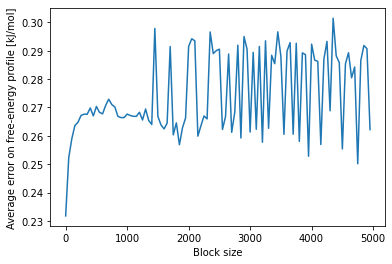

In [48]:
# import err.blocks file into pandas dataset
data=plumed.read_as_pandas("/content/Exercise-6/new_CV_2/err.blocks")
# plot error as a function of block size
plt.plot(data["bsize"],data["err"])
# x-y axis labels
plt.xlabel("Block size")
plt.ylabel("Average error on free-energy profile [kJ/mol]")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  


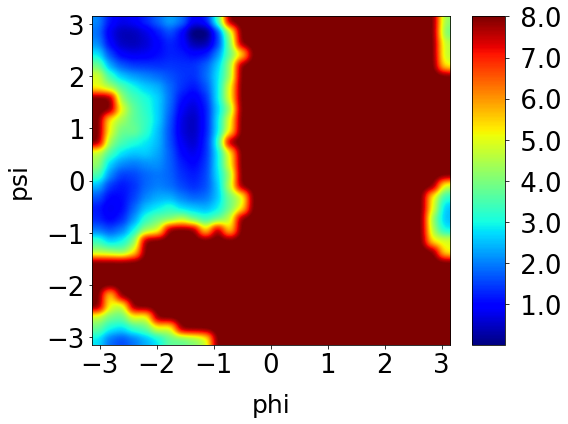

<Figure size 432x288 with 0 Axes>

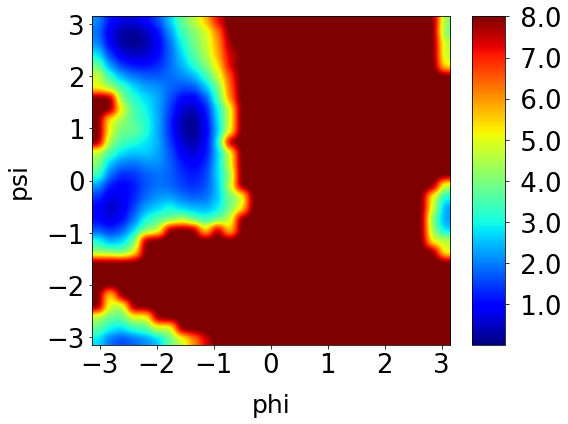

<Figure size 432x288 with 0 Axes>

In [49]:
# plot final fes
data_r=plumed.read_as_pandas("Exercise-6/new_CV_2/COLVAR_REWEIGHT")

bias=data_r["metad.bias"]
kt=2.494339
w=np.exp(bias/kt)

#Lets Look at The Biased and Unbiased Distributions of the Dihedral Angles
dG,xedges,yedges=free_energy(data_r["psi"],data_r["phi"], 300, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()

def free_energy_weights(a, b, T, y0, ymax, x0, xmax,w):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=w)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges

dG,xedges,yedges=free_energy_weights(data_r["psi"],data_r["phi"], 300, -3.14, 3.14, -3.14, 3.14,w)
fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()



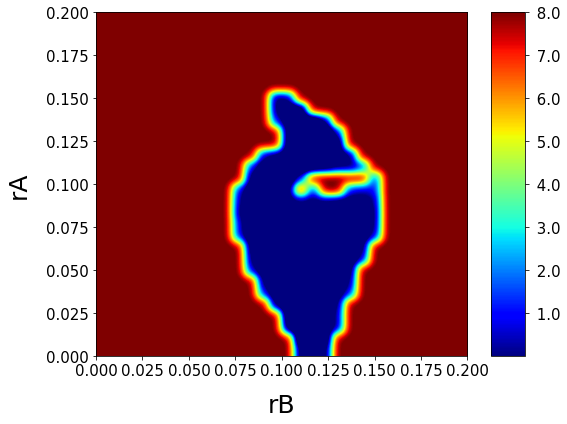

<Figure size 432x288 with 0 Axes>

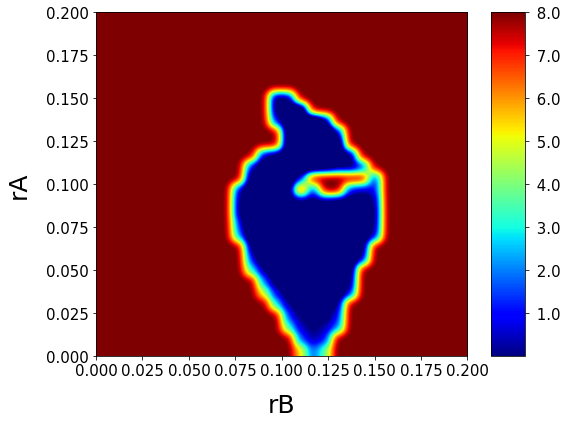

<Figure size 432x288 with 0 Axes>

In [50]:
#Lets Look at The Biased and Unbiased Distributions of the Dihedral Angles
dG,xedges,yedges=free_energy(data_r["rA"],data_r["rB"], 300, 0, 0.2, 0,.2)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(0,.2)
plt.ylim(0,.2)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("rA", size=25, labelpad=15)
plt.xlabel("rB", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='15')
plt.yticks(size='15')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='15')
plt.tight_layout()
plt.show()
plt.clf()

def free_energy_weights(a, b, T, y0, ymax, x0, xmax,w):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=w)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges

dG,xedges,yedges=free_energy_weights(data_r["rA"],data_r["rB"], 300, 0, 0.2, 0,.2,w)
fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(0,0.2)
plt.ylim(0,0.2)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("rA", size=25, labelpad=15)
plt.xlabel("rB", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='15')
plt.yticks(size='15')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='15')
plt.tight_layout()
plt.show()
plt.clf()